<a href="https://colab.research.google.com/github/savika10/ML--classification/blob/master/Marketing_campaign_for_Banking_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE**


---





> This is a standard supervised classification task.



> The classification goal is to predict the likelihood of a liability customer buying personal loans.







**Source of Dataset :**
 The data source is retrieved from kaggle

**Data Description:**
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Context:** 
The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.  


## **1.Importing modules and libraries**

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import metrics
sns.set(color_codes=True)
%matplotlib inline


All required modules and libraries are imported, if any new libraries to be imported its done when required in particular cell.

In [7]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (1).xlsx


The provided file is imported and uploaded

## **2.Loading the dataset**

In [13]:
#import the dataset
import io
df=pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']))
df=pd.DataFrame(dataset)
print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


**Attribute Information:**

● **ID:** Customer ID

● **Age:** Customer's age in completed years

● **Experience:** #years of professional experience

● **Income:** Annual income of the customer ($000)

● **ZIP Code:** Home Address ZIP code.

● **Family:** Family size of the customer

● **CCAvg:** Avg. spending on credit cards per month

● **Education:** Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● **Mortgage:** Value of house mortgage if any. 

● **Personal Loan:** Did this customer accept the personal loan offered in the last
campaign?

● **Securities Account:** Does the customer have a securities account with the bank?

● **CD Account:** Does the customer have a certificate of deposit (CD) account with
the bank?

● **Online:** Does the customer use internet banking facilities?

● **Credit card:** Does the customer use a credit card issued by the bank?






In [14]:
df.head(10) #gives the dataset information of first 10 rows.



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [15]:
df.sample(5) #pick random five rows.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
820,821,51,25,145,90740,1,0.3,1,0,0,0,0,1,0
3685,3686,53,27,93,94588,1,0.8,3,313,0,0,0,0,0
433,434,52,28,31,91330,4,0.2,1,141,0,0,0,1,1
828,829,35,9,28,94542,4,1.0,1,75,0,0,0,1,0
610,611,52,28,81,94132,3,1.8,2,275,0,0,0,0,0


In [ ]:
df.shape #5000 rows and 14 columns

(5000, 14)

In [16]:
df.index

RangeIndex(start=0, stop=5000, step=1)

In [17]:
df.describe() #describes many useful data like mean,count etc.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## **3.Preprocessing the data**

With the use of **describe** function we got the information that there are some **negative values** in the provided data which is undesired. So using **df._get_numeric_data()** we convert the negative values into zeros.

In [19]:
df.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


According to problem statement, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [20]:
A= df.isnull().values.any()
print(A)


False


this means dataset have no NULL values

In [21]:
#to find if there are any duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049925,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.049925,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


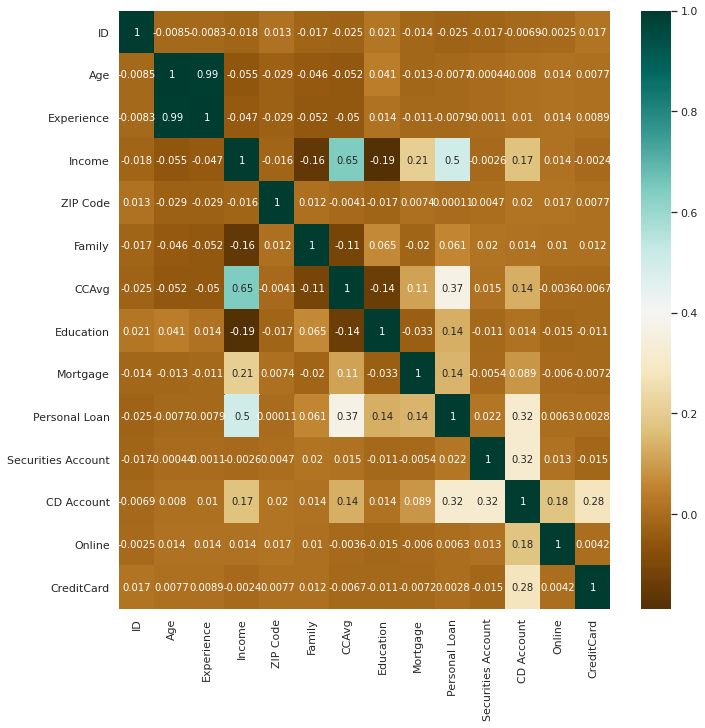

In [22]:
# Finding the relations between the variables.
plt.figure(figsize=(11,11))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

From this we know that age and experience are strongly correlated, so we can drop the experience column while making the model.

Also ID(has 5000 unique values) and ZIP Code does not required to train the model

In [24]:
df.drop(['ID','Experience','ZIP Code'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd016af4f10>,
      dtype=object)

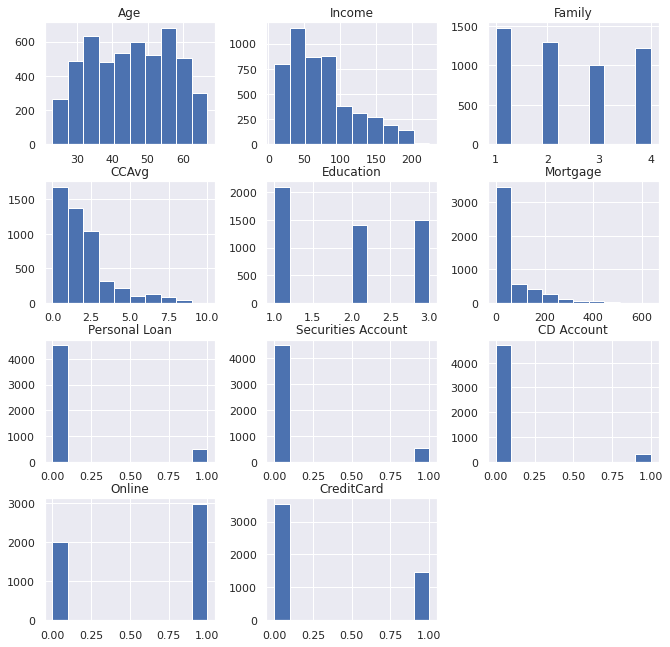

In [25]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
                        #brief of all the graphs
                        

**I have characterised the features into the four types:**


> 1. continuous : Age, Income, Mortgage,CCAvg
2. Dichotomous : CD Account,Online,Personal Loan,Securities account,Credit card
3. Ordinal: Education, Family





Let's Convert Dichotomous data and ordinal data into categorical data type

In [26]:
#changing following variables to category type
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
df[var]=df[var].astype('category')

In [27]:
df.dtypes

Age                      int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

##**4.Exploratory Data Analysis(EDA)**

**NUMBER OF UNIQUE IN EACH COLUMN**

In [28]:
df.nunique(axis=0)

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**NUMBER OF PEOPLE WITH ZERO MORTGAGE**

In [29]:
(df.Mortgage==0).sum()

3462

**NUMBER OF PEOPLE WITH ZERO CREDIT CARD SPENDING PER MONTH**

In [30]:
(df.CCAvg==0).sum()

106

**VALUE COUNTS OF ALL CATEGORICAL COLUMN**

In [31]:
#A for loop is runned across the columns to get the value counts.
for i in range (0,11):
    count=df.iloc[:,i].value_counts()
    print(count)
    print("---------------------------------------------------------------------")

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
---------------------------------------------------------------------
44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64
---------------------------------------------------------------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
---------------------------------------------------------------------
0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
8.2

## **5.Analysis of various information through plots**

**UNIVARIATE** **ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


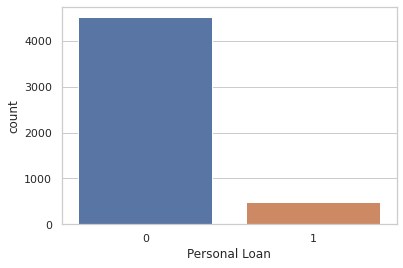

In [32]:
sns.set_style("whitegrid")
sns.countplot(df['Personal Loan']);


The graph depicts that more tham 4500 customers have not taken personal loans and very few i.e, less than 500 have taken the personal loan in the bank. This graph purely says that work need to be done to improve the number of customers to take loan.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


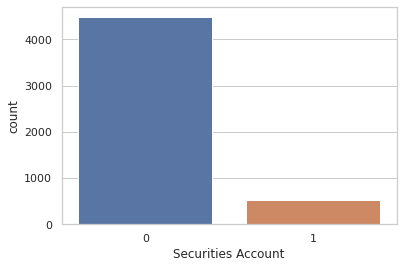

In [33]:
sns.set_style("whitegrid")
sns.countplot(df['Securities Account']);

This graph almost resembles same as that of the personal loan graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


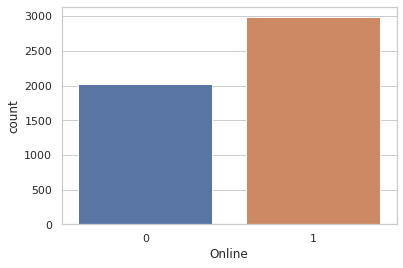

In [34]:
sns.set_style("whitegrid")
sns.countplot(df['Online']);

This is a positive graph that tells us that around 3000 customers use the online banking facilities,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


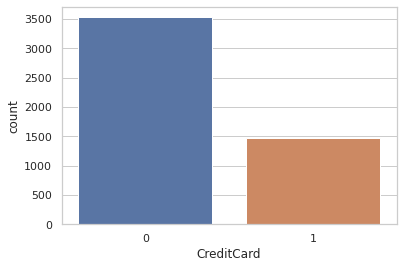

In [35]:
sns.set_style("whitegrid")
sns.countplot(df['CreditCard']);

A group of around 1500 customers use the creditcard facilities provided by the bank.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


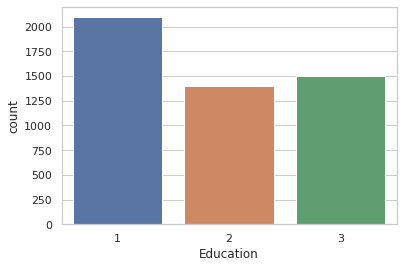

In [36]:
sns.set_style("whitegrid")
sns.countplot(df['Education']);

1: Undergrad; 2: Graduate; 3: Advanced/Professional

The graph shows that there are more undergraduates in the group of bank customers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


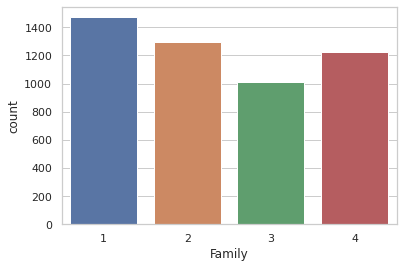

In [37]:
sns.set_style("whitegrid")
sns.countplot(df['Family']);


The distribution of family.

In [ ]:
print("income skewness value",df['Income'].skew()) 		
print("age skewness value",df['Age'].skew())
print("ccavg skewness value",df['CCAvg'].skew())
print("mortgage skewness value",df['Mortgage'].skew())

income skewness value 0.8413386072610816
age skewness value -0.02934068151284029
ccavg skewness value 1.598456618052042
mortgage skewness value 2.1040023191079444


For a symmetric data should have a **skewness near zero**,hence, the data of **age need not to be transformed** whereas for the positive skewed data(income,ccavg,and mortage)

1.   the data of **income and ccavg** need to be transformed.
2.   Also for data of **mortgage**, binning the data is better option than transforming the data.


 

 

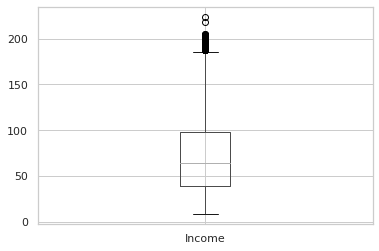

In [40]:
df.boxplot(column='Income');
#from this we came to know that there is outliers in the graph


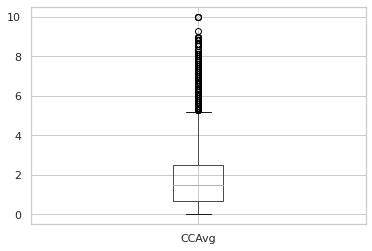

In [41]:
df.boxplot(column='CCAvg');
#from this we came to know that there is outliers in the graph

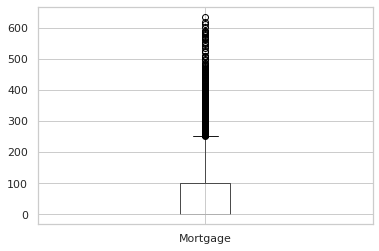

In [42]:
df.boxplot(column='Mortgage');
#from this we came to know that there is outliers in the graph

**BIVARIATE** **ANALYSIS**

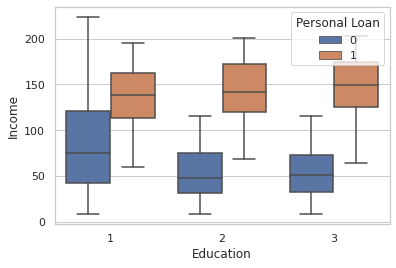

In [43]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset)

Customer who have more income have granted Personal Loan w.r.t Eductation Level

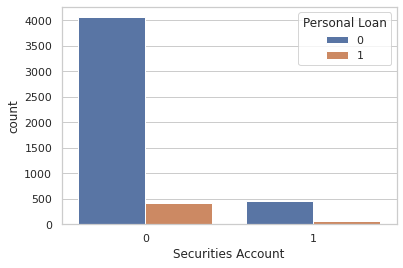

In [44]:
sns.countplot(x="Securities Account",hue="Personal Loan",data=dataset)

Most of the customers who have the securities account does not have the personal loan.

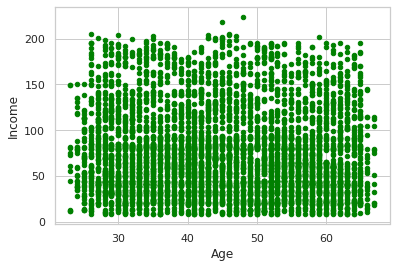

In [45]:
df.plot(x='Age', y='Income',kind='scatter',color='green')
plt.show()


The graph shows us that there is uniform distribution between income and age.

<Figure size 800x640 with 0 Axes>

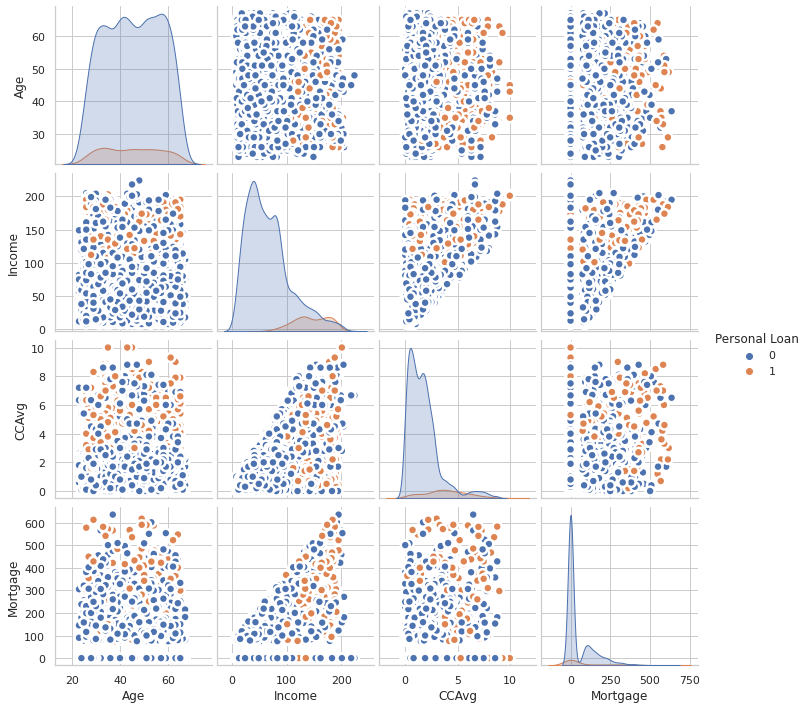

In [47]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="Personal Loan", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show() #these pairplots gives us information of all data with respect to personal loan.

## **5.Normalisation of data**

power transformer is better than log transformations so this is used.

**Transformation of income**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


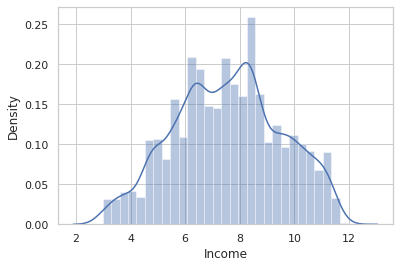

In [48]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["Income"].values.reshape(-1,1))
temp=pt.transform(df['Income'].values.reshape(-1,1))
df['Income']=temp
sns.distplot(df['Income']);

**Transformation of CCAvg**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


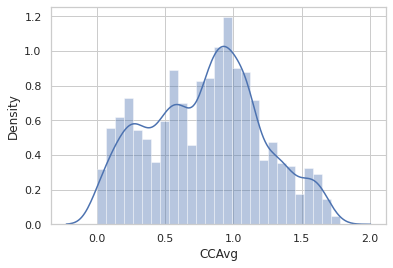

In [50]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["CCAvg"].values.reshape(-1,1))
temp=pt.transform(df['CCAvg'].values.reshape(-1,1))
df['CCAvg']=temp
sns.distplot(df['CCAvg']);

**Binning of Mortgage**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


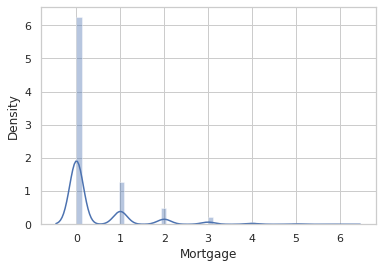

In [51]:
bins = [0, 100, 200, 300, 400, 500, 600, 700]
group_names = [ 0, 1, 2, 3, 4, 5, 6]
df['Mortgage']= pd.cut(df['Mortgage'], bins, labels=group_names,include_lowest="true")

pd.value_counts(df['Mortgage'])
sns.distplot(df['Mortgage']);




To verify the removal of outliers for income and ccavg.

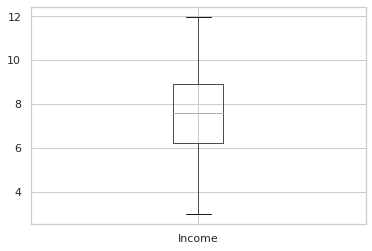

In [52]:
df.boxplot(column='Income');

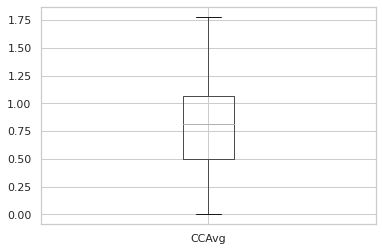

In [53]:
df.boxplot(column='CCAvg');

## **6.Training of model**

In [54]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Personal Loan','Family'],axis=1)
y=df['Personal Loan']

In [55]:
x.head()

,Age,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,0.845150,1,0,1,0,0,0
1,45,5.876952,0.814468,1,0,1,0,0,0
2,39,3.504287,0.633771,1,0,0,0,0,0
3,35,8.983393,1.107409,2,0,0,0,0,0
4,35,6.597314,0.633771,2,0,0,0,0,1


for the training testing process for the x variable **family is dropped** as it is not related that much to the personal loan and as we have particularly taken **personal loan for the y variable so its also dropped** in particular for the x variable. It is split in the ratio of 70:30(training:testing)

**SPLITTING THE DATA USING STRATIFIED SAMPLING**

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 9)
(1500, 9)
(3500,)
(1500,)


##**7.Model building**

In [59]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

Why is standard scaler used?

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

In [60]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)


Instead of typing the code to run different models its better to define a function and to call it when required.

In [61]:
def classify(model,x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
  model.fit(x_train,y_train)
  y_pred1=model.predict(x_test)
  y_pred2=model.predict(x_train)
  print("Accuracy of training :",metrics.accuracy_score(y_train,y_pred2)*100)
  print("Accuracy of testing :",metrics.accuracy_score(y_test,y_pred1)*100)
  print("ROC score :",metrics.roc_auc_score(y_test,y_pred1)*100)
  result=classification_report(y_test,y_pred1)
  print("Classification report :",)
  print(result)
  print("Confusion Matrix :")
  confusion_matrix=pd.crosstab(y_test,y_pred1,rownames=["Actual"],colnames=["Predicted"])
  sns.heatmap(confusion_matrix,annot=True)

#**LOGISTIC REGRESSION MODEL**


> Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of training : 95.0
Accuracy of testing : 95.26666666666667
ROC score : 80.41180758017492
Classification report :
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1372
           1       0.78      0.62      0.69       128

    accuracy                           0.95      1500
   macro avg       0.87      0.80      0.83      1500
weighted avg       0.95      0.95      0.95      1500

Confusion Matrix :


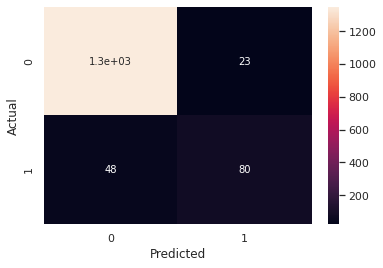

In [63]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
classify(model,x,y)  #warnings are ignored

Advantage of Logistic Regression is that it is incredibly easy to implement and very efficient to train. I typically start with a Logistic Regression model as a benchmark and try using more complex algorithms from there on.

#**Decision Tree Classifier**

> A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter



Accuracy of training : 98.37142857142858
Accuracy of testing : 96.66666666666667
ROC score : 86.84402332361516
Classification report :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       0.84      0.75      0.79       128

    accuracy                           0.97      1500
   macro avg       0.91      0.87      0.89      1500
weighted avg       0.97      0.97      0.97      1500

Confusion Matrix :
Decision Tree Graph :


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


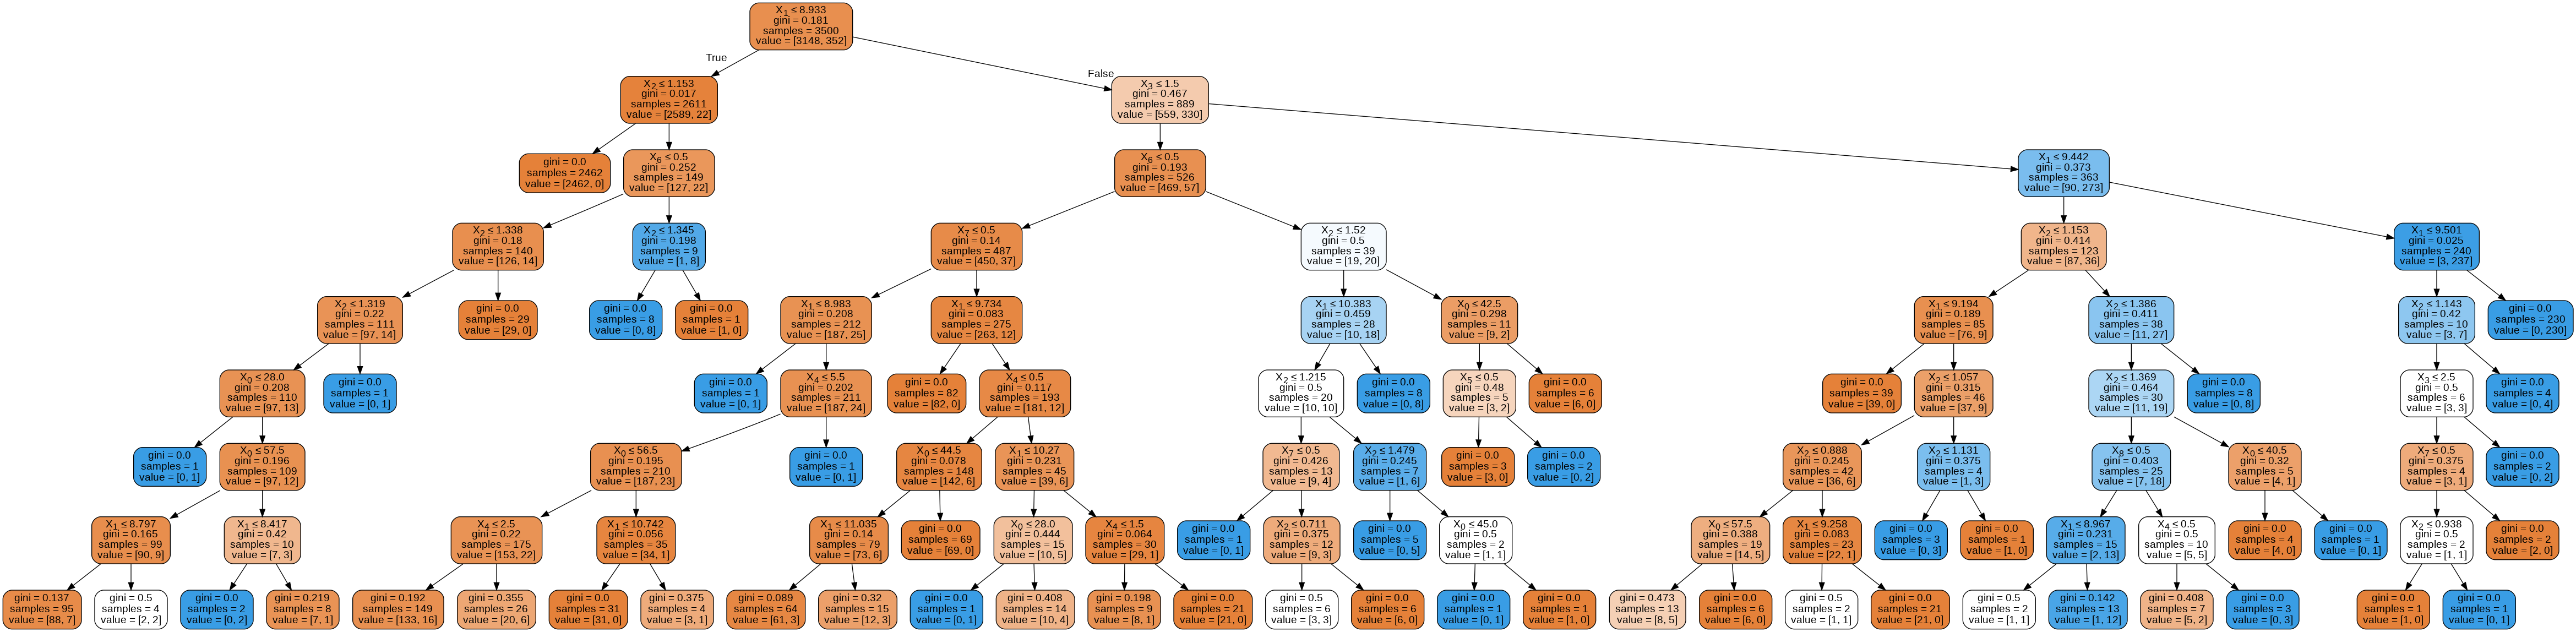

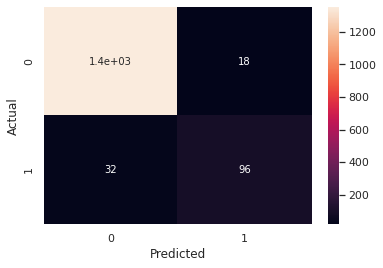

In [64]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0,max_depth=8)
classify(model,x,y)
print("Decision Tree Graph :")
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) #the decision tree is better viewed when it is zoomed in.

Decision trees perform classification without requiring much computation. Decision trees are capable of handling both continuous and categorical variables. Decision trees provide a clear indication of which fields are most important for prediction or classification

#**Random forest classifier**

> 
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.



Accuracy of training : 98.45714285714286
Accuracy of testing : 97.2
ROC score : 87.13556851311954
Classification report :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       0.91      0.75      0.82       128

    accuracy                           0.97      1500
   macro avg       0.94      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500

Confusion Matrix :


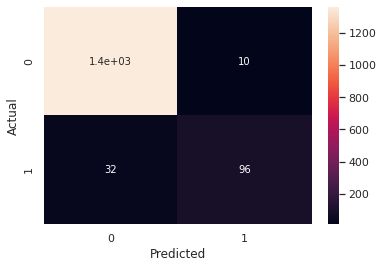

In [65]:

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)
classify(model,x,y)

It runs efficiently on large databases. It can handle thousands of input variables without variable deletion. It gives estimates of what variables are important in the classification.

#**Extra trees classifier**


> Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.



Accuracy of training : 96.74285714285715
Accuracy of testing : 96.6
ROC score : 81.14067055393586
Classification report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1372
           1       0.96      0.62      0.76       128

    accuracy                           0.97      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.97      0.97      0.96      1500

Confusion Matrix :


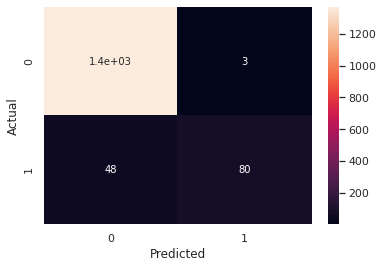

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier(random_state=0,n_estimators=500,max_depth=8)
classify(model,x,y)


In terms of computational cost, and therefore execution time, the Extra Trees algorithm is faster. This algorithm saves time because the whole procedure is the same, but it randomly chooses the split point and does not calculate the optimal one.

#**KNNeighbors CLASSIFIER**

> K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).



Accuracy of training : 95.97142857142858
Accuracy of testing : 95.66666666666667
ROC score : 77.79701166180757
Classification report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1372
           1       0.89      0.56      0.69       128

    accuracy                           0.96      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.96      0.95      1500

Confusion Matrix :


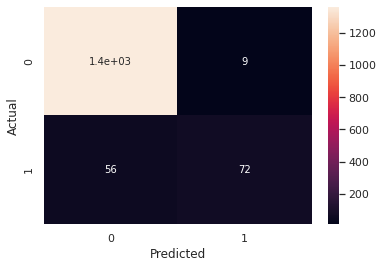

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classify(model,x,y)

Very simple implementation. Robust with regard to the search space; for instance, classes don't have to be linearly separable. Classifier can be updated online at very little cost as new instances with known classes are presented.

#**GAUSSIAN NAIVE BAYES**

> Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. ... Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality.



Accuracy of training : 90.51428571428572
Accuracy of testing : 91.46666666666667
ROC score : 74.79272959183675
Classification report :
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1372
           1       0.50      0.55      0.52       128

    accuracy                           0.91      1500
   macro avg       0.73      0.75      0.74      1500
weighted avg       0.92      0.91      0.92      1500

Confusion Matrix :


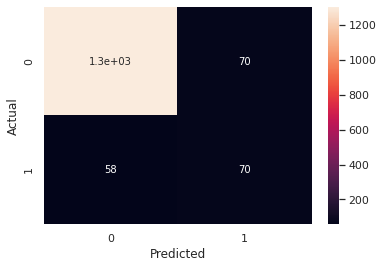

In [68]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classify(model,x,y)


This algorithm is a good fit for real-time prediction, multi-class prediction, recommendation system, text classification, and sentiment analysis use cases. Naive Bayes Algorithm can be built using Gaussian, Multinomial and Bernoulli distribution. This algorithm is scalable and easy to implement for the large data set.

#**Neural Networks**


> Artificial neural networks are relatively crude electronic networks of neurons based on the neural structure of the brain. They process records one at a time, and learn by comparing their classification of the record (i.e., largely arbitrary) with the known actual classification of the record.

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron




In [69]:

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
print(clf.fit(x,y))

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


Accuracy of training : 96.97142857142858
Accuracy of testing : 97.0
ROC score : 83.1302387026239
Classification report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1372
           1       0.98      0.66      0.79       128

    accuracy                           0.97      1500
   macro avg       0.97      0.83      0.89      1500
weighted avg       0.97      0.97      0.97      1500

Confusion Matrix :


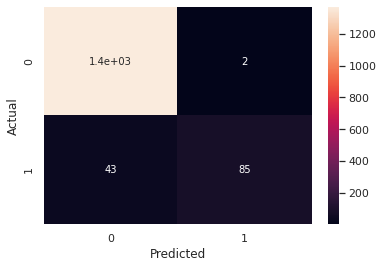

In [71]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(random_state=0,max_iter=300)
classify(model,x,y)

##**8.Overall Business understanding of the model**


The main purpose of the project is to increase the number of customers taking the personal loan and minimize the marketing cost of the campaign,considering all the key aspects for the model(accuracy,recall,roc_score and the confusion matrix) . The top three suitable models are:

1.   **RandomForestClassifier**- Accuracy of training : 98.46,Accuracy of testing : 97.2, ROC score : 87.14, 32 potential customers do not have loan
2.   **DecisionTreeClassifier**- Accuracy of training : 98.37,Accuracy of testing : 96.67, ROC score : 86.84, 32 potential customers do not have loan
3.  **MLPClassifier(Neural network)**- Accuracy of training : 96.97,Accuracy of testing : 97.0, ROC score : 83.13, 43 potential customers do not have loan 



The remaining models(Logistic Regression,Extra Trees Classifier,KNNeighbors Classifier,Gaussian naive bayes also provide good outcomes but are not better than the above three. From the various plots taken in the project we get the information that considering all the sectors of the education level,the customers with high income is granted the loan facilities from the bank.Most of the customers who have the securities account does not have the personal loan.

**To increase the number of customers taking personal loans**, the bank can concentrate on the undergrads, providing them loans for the need of education with a suitable rate of intrest.For those who have securities account in the bank will get higher amount loans with less procedural way.

**The ways for minimizing the marketing cost of the campaign without making a negative impact on the buisness** can be done through the following ways: concentrating mainly on the buisness and to reduce your marketing spend, start with the projects that aren’t producing sales. Digitalization of bank activities, giving guidelines and knowledge through e-advertisments. some of the points like avoiding arbitrary cuts,transorming cost reductions and striking the right balance plays the key factor.

The main thing is, in the current trend of competition the one who is more efficient and more unique leads the go. So utilization of social medias and technoloy is important. To win customers for the bank boostage of brand,offering better products,increasing the presence of bank and making switching easier.

####Through this project we have got opportunity to learn the beautiful concept of Machine Learning and its real life applications. The usage of various parts of learning for particular uses.The positive outcome of the project is most important and provides a satisfactory feel.